## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

# Let us visualise using a few graphs to understand the distribution of datapoints

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


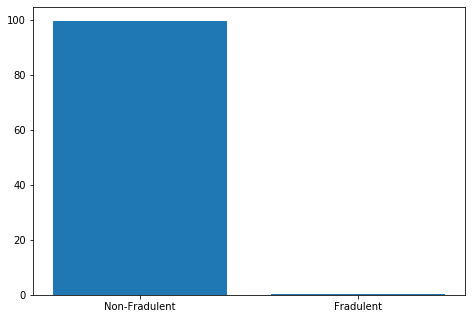

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l = ['Non-Fradulent' , 'Fradulent']
l2 = [normal_share , fraud_share]
ax.bar(l,l2)
plt.show()

# It can be seen that there is high class imbalance

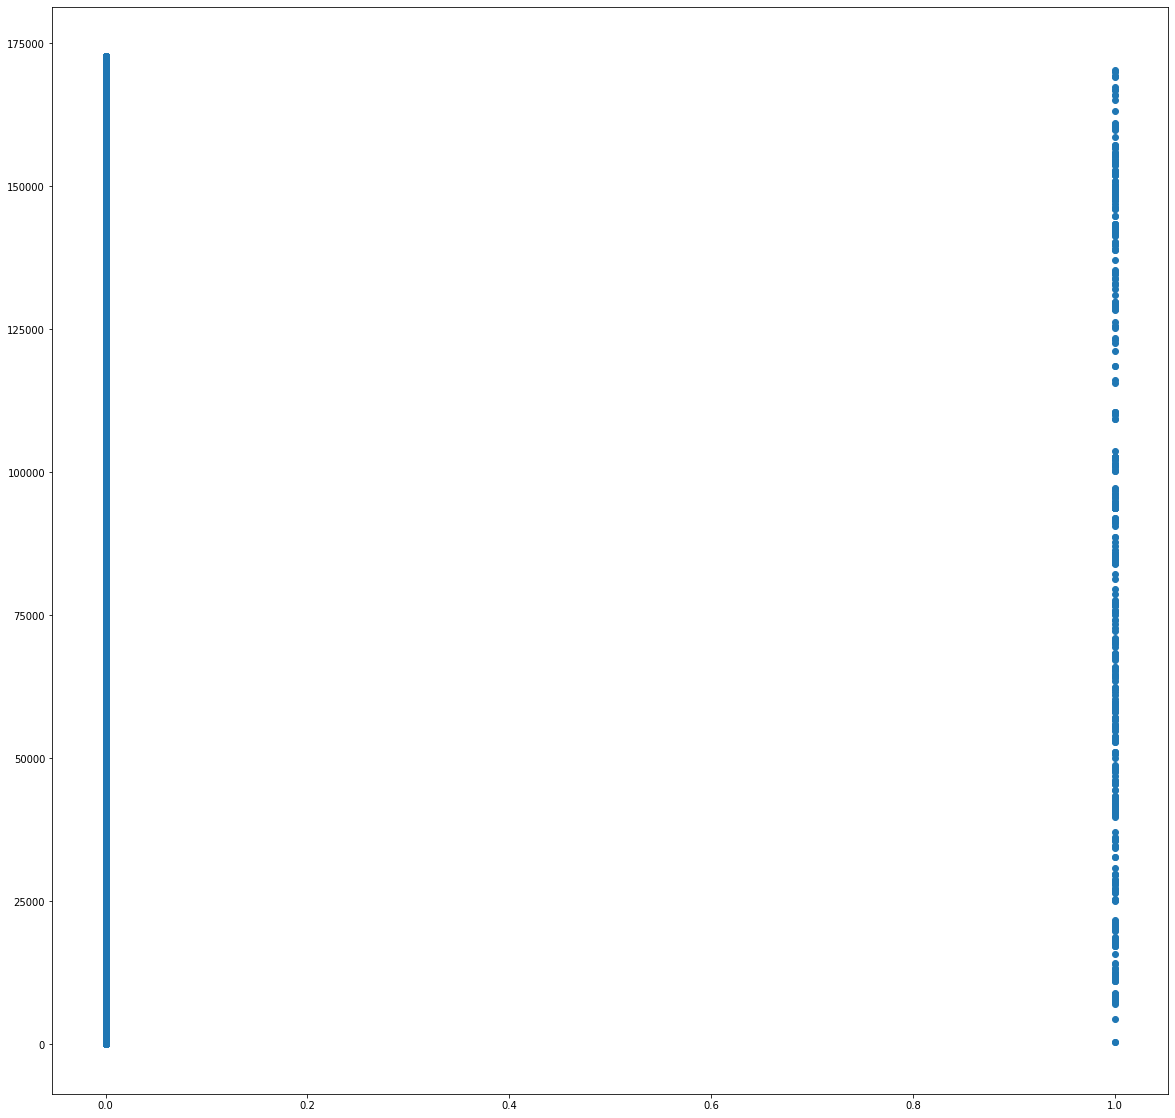

In [7]:
# Create a scatter plot to observe the distribution of classes with time
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
plt.scatter(df['Class'] , df['Time'])
plt.show()

Text(0, 0.5, 'Amount')

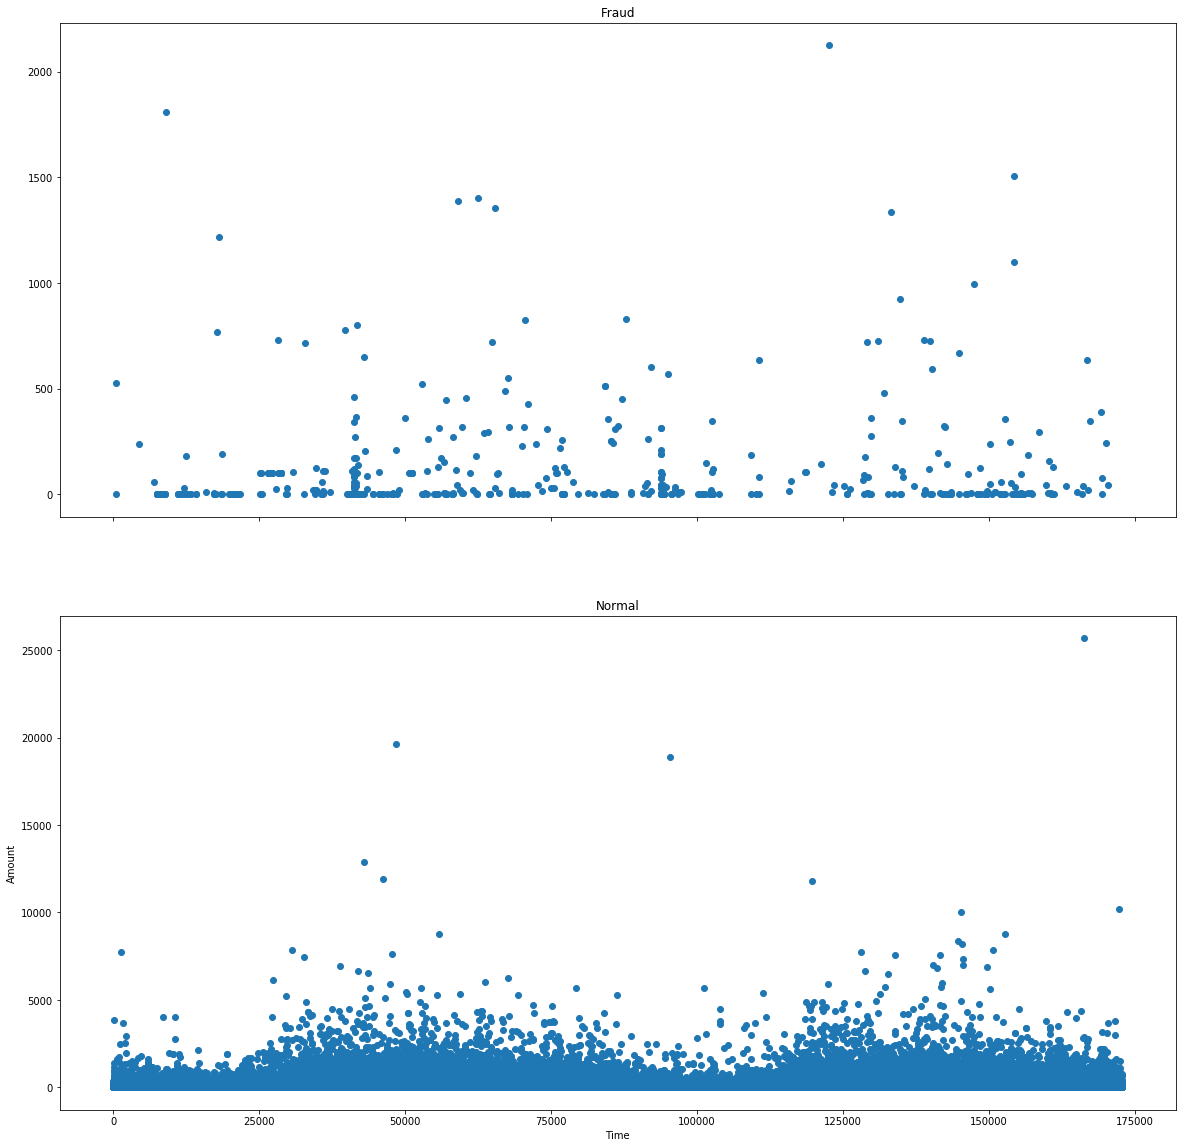

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.set_figwidth(20)
f.set_figheight(20)
ax1.scatter(df[df['Class']==1].Time, df[df['Class']==1].Amount)
ax1.set_title('Fraud')
ax2.scatter(df[df['Class']==0].Time, df[df['Class']==0].Amount)
ax2.set_title('Normal')
plt.xlabel('Time')
plt.ylabel('Amount')

# No noticeable pattern due to immense class imbalance

Text(0.5, 1.0, 'Normal')

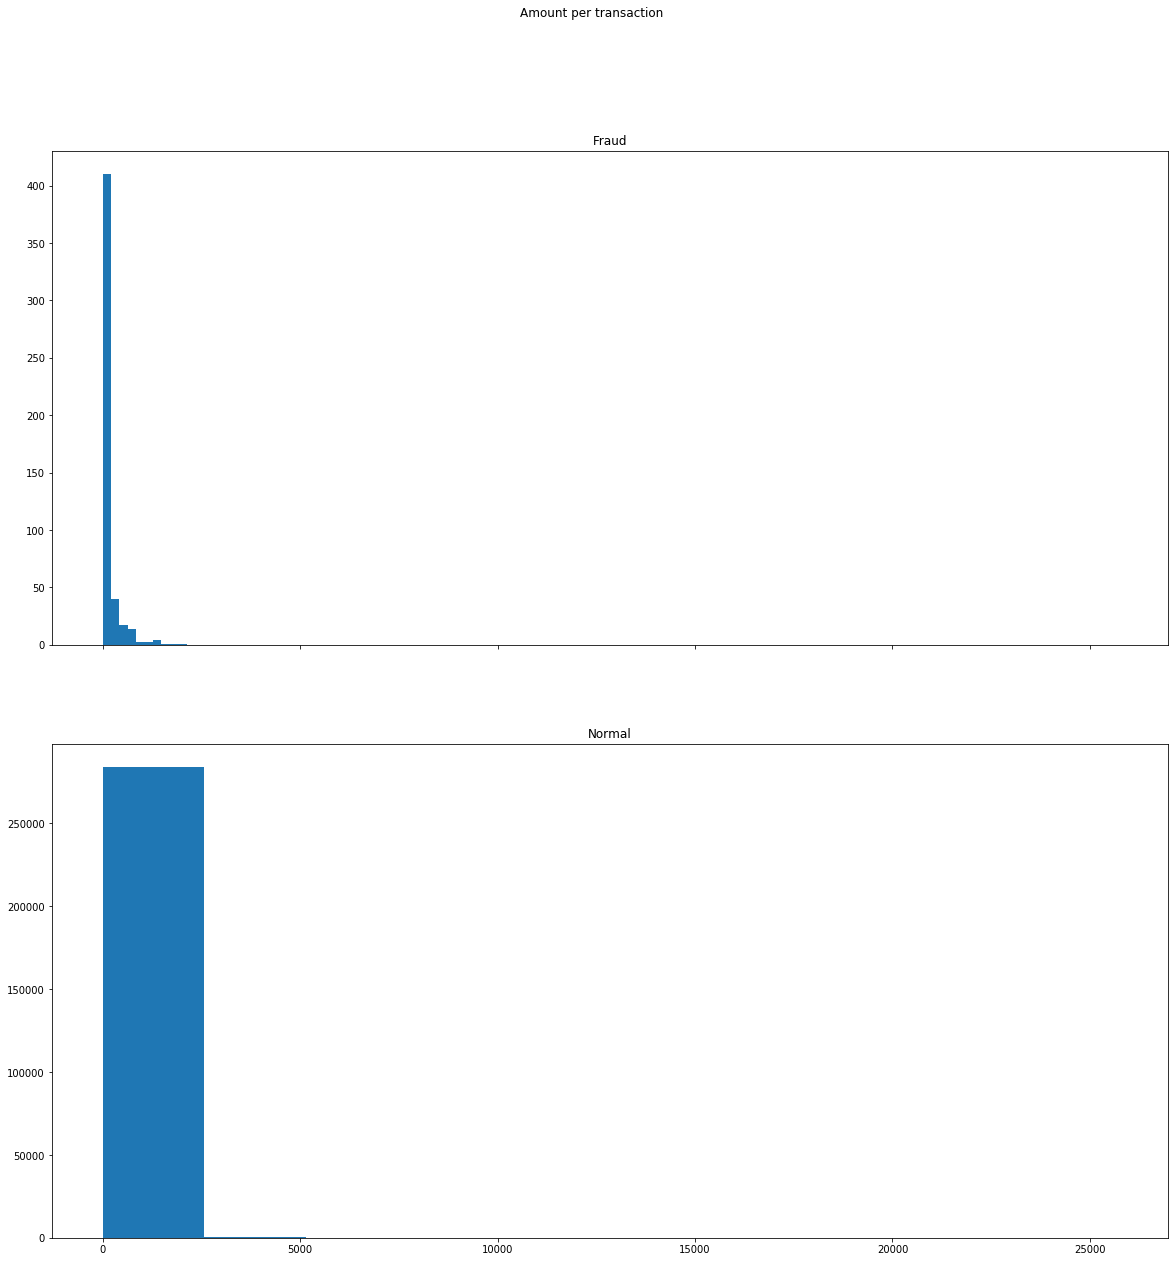

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction')
f.set_figwidth(20)
f.set_figheight(20)

ax1.hist(df[df['Class']==1].Amount)
ax1.set_title('Fraud')

ax2.hist(df[df['Class']==0].Amount)
ax2.set_title('Normal')

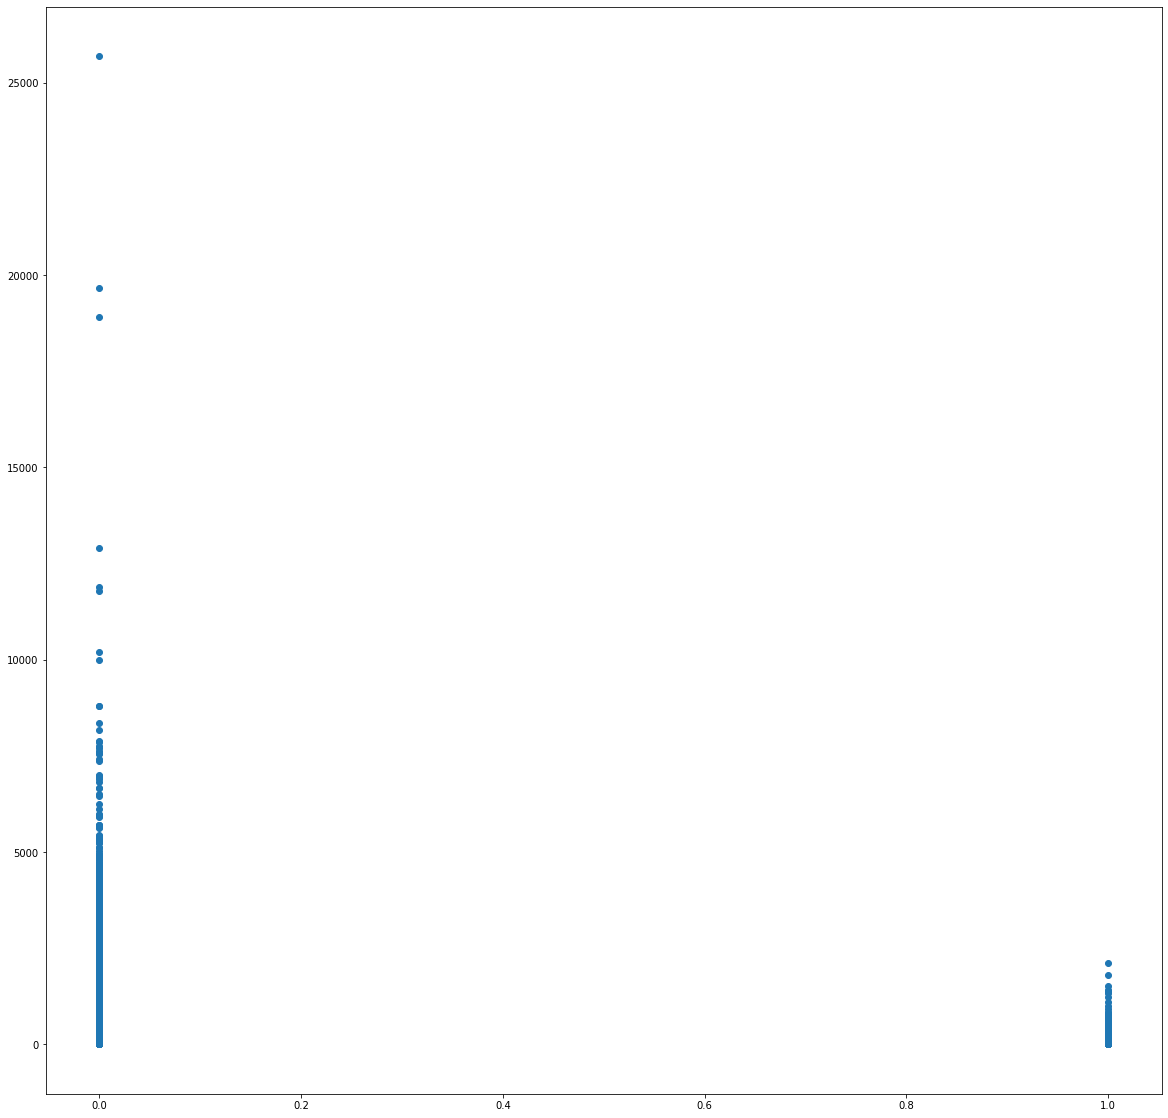

In [10]:
# Create a scatter plot to observe the distribution of classes with Amount
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
plt.scatter(df['Class'] , df['Amount'])
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['Time' , 'Amount']])
df[['Time' , 'Amount']]=scaled

<BarContainer object of 30 artists>

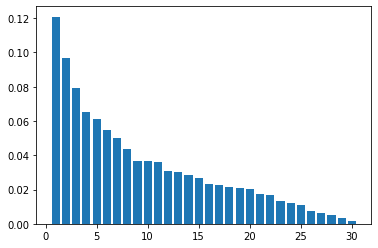

In [12]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
y = df.pop('Class')
x = df.copy()
pca.fit(x)
plt.bar(range(1,len(pca.explained_variance_ratio_)+1) , pca.explained_variance_ratio_)

In [13]:
pca.explained_variance_ratio_

array([0.12088206, 0.09654333, 0.0792491 , 0.06548459, 0.06090455,
       0.05492346, 0.04985652, 0.04372582, 0.03692046, 0.03686609,
       0.03580899, 0.03078275, 0.03029957, 0.02844072, 0.02659639,
       0.02346401, 0.02235878, 0.02173401, 0.02118511, 0.02007162,
       0.01752752, 0.01655258, 0.01309067, 0.01194615, 0.01119211,
       0.00718657, 0.00658241, 0.0049962 , 0.00333107, 0.00149677])

# Let us pick the optimum number of features

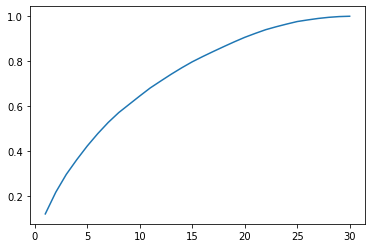

In [14]:
var_cumu=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1) ,var_cumu)

In [15]:
pc2 = PCA(n_components=25 , random_state =42)
newdata=pc2.fit_transform(x)
col= []
for i in range(1,26):
    col.append('PC'+str(i))
df_2 = pd.DataFrame(newdata , columns = col)
df_2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,1.571678,-0.675572,-3.096615,0.899554,-0.884711,0.373915,0.229087,-0.120678,0.371258,-0.129868,...,-0.436811,0.025316,-0.191733,0.120154,-0.456645,-0.150159,0.166917,0.445229,-0.082300,0.023869
1,-1.086213,-0.282673,-1.099690,0.571632,-0.399960,-0.070056,-0.332646,-0.180100,-0.156037,1.371511,...,0.465630,-0.056058,0.256570,-0.174429,0.126562,0.864573,-0.125043,0.249283,-0.268380,-0.399016
2,2.053411,1.077634,-2.754366,0.952711,0.162573,1.618920,0.150840,-0.431071,-1.374761,0.546455,...,-2.834418,-0.508174,-0.688502,-0.601299,1.888317,-1.434336,0.383261,-0.448906,-0.828221,-0.705816
3,1.150107,-0.427442,-2.203270,-0.053198,1.003291,1.280104,0.026183,-0.406667,-1.380006,-0.030120,...,-1.068518,0.863602,-1.345261,-0.517276,1.270751,1.167741,-0.035997,1.335588,-0.356424,-1.321379
4,1.143820,-1.341999,-1.819279,0.847795,-0.000287,0.102924,0.600076,0.180125,0.878071,-0.776366,...,-0.478387,-0.021550,0.189739,-0.131090,-0.899346,0.083482,0.332435,1.311565,-0.346610,0.034233
5,0.334154,-1.433954,-1.540188,0.183778,0.136725,0.286043,0.485855,-0.382719,-0.506718,1.312603,...,0.404416,-0.004911,-0.038176,-0.206815,-0.038795,0.723939,-0.070439,0.110299,-0.044236,-0.393197
6,-1.103119,-0.085961,-0.911468,0.741626,-1.117098,0.256234,-0.255170,-0.130416,0.458039,0.030000,...,-0.504542,-0.646655,0.823354,-0.160545,0.096509,1.150597,-0.124481,1.272232,-0.394638,-0.932698
7,0.510067,-1.664872,-1.041335,0.088752,0.369263,1.105668,1.635609,3.555863,0.825316,-0.505450,...,-0.083722,0.660594,0.836901,-0.638296,-0.460685,0.702332,-2.257617,0.703251,-0.426809,-0.734890
8,0.919616,-0.664360,-0.286892,-0.775289,-0.501257,4.412757,-0.317529,-0.968122,-0.394936,0.635186,...,-0.257592,0.005201,0.326560,-0.214537,-0.569515,1.335449,-0.183996,1.484100,-0.472403,0.858134
9,0.219178,-1.517512,-1.348390,0.150644,0.156676,0.156047,0.774511,-0.205406,-0.684323,1.147891,...,0.736305,0.401011,-0.156838,-0.257869,-0.520533,1.165165,-0.089860,0.471295,-0.107419,-0.441837


# 25 top features have been picked

### Splitting the data into train & test data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_2, y, test_size=0.2, random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [17]:
X_for_t = X_test
y_for_t = y_test
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

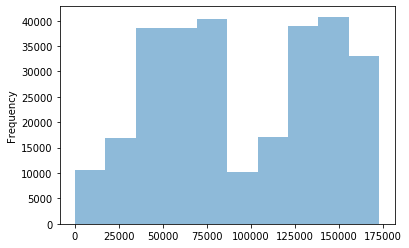

In [18]:
# plot the histogram of a variable from the dataset to see the skewness
df_graph = pd.read_csv('creditcard.csv')
ax = df_graph['Time'].plot.hist(alpha=0.5)

# The above curve isn't normal, so applying Power Transformer

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [19]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(copy=False)
X_train_tran = power.fit_transform(X_train)
X_test_tran = power.fit_transform(X_test)
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

In [20]:
X_train_tran=pd.DataFrame(X_train_tran , columns = col)
X_test_tran=pd.DataFrame(X_test_tran , columns = col)

In [21]:
X_train_tran

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-1.434182,0.548506,0.385174,0.100293,-0.193205,-0.222246,-0.544499,0.177819,0.930710,-0.309978,...,0.349330,1.351900,-0.302642,0.172786,-0.038001,-0.978113,0.230889,0.393035,-0.077860,-0.546761
1,0.465042,0.125896,-0.537761,-0.927337,1.423967,0.292189,0.239798,0.571163,0.055939,-1.538205,...,-0.165881,2.387930,-1.633208,-0.655490,2.165955,0.131188,0.292990,-0.187910,0.206776,-1.476161
2,-0.002599,-0.341609,0.915242,-0.592720,0.101331,0.282053,0.901374,-0.115181,-0.106016,0.426518,...,0.736069,-0.035096,-0.476007,0.010767,-0.213852,1.036496,-0.137305,-1.124516,0.321866,0.287611
3,0.531877,-0.597980,-0.972458,0.921931,-1.583816,0.970815,0.805635,0.110128,0.437820,-0.481110,...,1.904749,1.014736,-0.774400,-0.812928,2.480037,-0.920155,0.208443,-0.655569,0.510920,0.882738
4,1.633633,-1.791810,0.650666,0.452187,0.169753,-0.612728,-0.529543,-1.428100,0.586276,-1.010131,...,0.039729,-0.289278,0.239237,0.173090,-0.795362,0.871773,0.359704,0.175219,-0.510576,-0.060709
5,0.621106,-0.808312,-0.336391,0.243585,-0.481955,0.427485,0.544123,-0.100100,0.076869,-0.240884,...,-0.409855,0.423009,-0.016985,0.099775,-0.426507,-0.112303,0.114369,0.772233,0.202207,-1.292386
6,-0.640405,0.022154,-0.302822,0.434643,-0.670369,-0.254692,0.081512,0.162587,0.069636,0.185867,...,-0.262587,0.263869,0.571512,-0.256758,0.915512,-0.681241,0.083274,0.473614,-0.086100,0.008473
7,0.103925,0.047809,0.442360,-0.722425,0.004092,1.472527,0.380780,-0.184470,0.261931,0.117676,...,-1.319737,-0.627721,1.443797,-0.670412,1.968811,-2.934799,0.611158,0.142469,0.437675,-2.556567
8,0.545594,-0.750522,0.136423,1.163790,-2.819360,0.674469,1.658474,0.928708,0.599880,-1.532543,...,-1.193254,-0.283206,-0.062213,1.168356,-1.284864,-1.096944,0.816154,-1.009543,0.198272,-0.180668
9,0.151588,0.084608,0.038057,-0.913466,1.868345,-0.626828,0.312035,0.438786,-2.341127,-1.244888,...,-0.953673,-0.520801,0.126816,0.288034,0.528510,-0.633645,0.216590,-0.422603,0.506506,0.010948


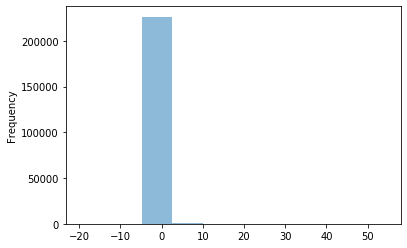

In [22]:
ax = X_train_tran['PC5'].plot.hist(alpha=0.5)
# plot the histogram of a variable from the dataset again to see the result 

# PCA would have ensured the removal of multicollinearity, but let us confirm using a correlation matrix

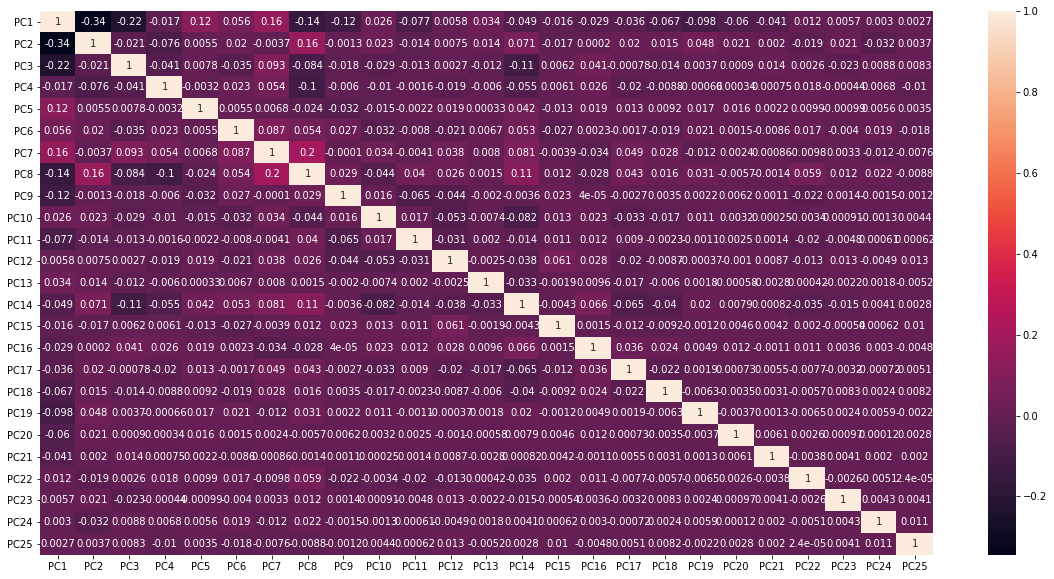

In [23]:
plt.figure(figsize = (20,10))        
sns.heatmap(X_train_tran.corr(),annot = True)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [24]:
# Logistic Regression
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
from sklearn.model_selection import KFold
filterwarnings('ignore')
model = LogisticRegression()
solvers = ['saga']
penalty = ['l1']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Trying Logistic Regression

In [74]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_tran, y_train)

In [77]:
results = grid_result.cv_results_
results

{'mean_fit_time': array([ 58.78275681, 114.32255859, 112.55732465, 103.32970624,
         87.92105837]),
 'mean_score_time': array([0.13797765, 0.26939616, 0.17510033, 0.13438382, 0.26374426]),
 'mean_test_score': array([0.99920121, 0.99920121, 0.9992056 , 0.99918804, 0.99910027]),
 'param_C': masked_array(data=[100, 10, 1.0, 0.1, 0.01],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l1', 'l1', 'l1', 'l1'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['saga', 'saga', 'saga', 'saga', 'saga'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 100, 'penalty': 'l1', 'solver': 'saga'},
  {'C': 10, 'penalty': 'l1', 'solver': 'saga'},
  {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'},
  {'C': 0.1, 'penalty': 'l1', 'solv

In [85]:
grid_result.best_score_


0.9992056002984485

In [86]:
grid_result.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [94]:
import sklearn.metrics
from sklearn.metrics import *
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
lr.fit(X_train_tran, y_train)
y_pred = lr.predict(X_test_tran)
score = accuracy_score(y_test, y_pred)
score

0.9991924440855307

In [96]:
precision_score(y_test, y_pred)

0.8823529411764706

In [97]:
recall_score(y_test, y_pred)

0.6122448979591837

# Chaning the scoring metric to Recall since that might be a better indication of the model performance

# Trying Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(random_state=42)
params = {
    'max_depth': [2,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10, 25, 50, 100]
}
grid_search_1 = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1 , verbose=1, scoring="recall")
grid_result_1 = grid_search_1.fit(X_train_tran, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 85.2min finished


In [101]:
grid_result_1.best_score_

0.7589829593646389

In [102]:
grid_result_1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [119]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
rf.fit(X_train_tran, y_train)
y_pred = rf.predict(X_test_tran)
score = recall_score(y_test, y_pred)
score

0.7653061224489796

# Performance is fairly better than that of Logistic Regression

# Trying XGBoost

In [25]:
import xgboost
from xgboost import XGBClassifier

In [105]:
xgreg = xgb.XGBClassifier()
params_2 = {"learning_rate"    : [0.10, 0.15, 0.20, 0.25] ,
 "max_depth"        : [ 3, 4, 5, 12, 15],
 "gamma"            : [ 0.0, 0.15 , 0.3]}
grid_search_2 = GridSearchCV(estimator=xgreg,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="recall")
grid_result_2 = grid_search_2.fit(X_train_tran, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 120.0min finished


In [106]:
grid_result_2.best_score_

0.7741923047266558

In [107]:
grid_result_2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, min_samples_leaf=5, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [120]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, min_samples_leaf=5, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)
xgb.fit(X_train_tran, y_train)
y_pred = xgb.predict(X_test_tran)
score = recall_score(y_test, y_pred)
score

0.7755102040816326

In [ ]:
grid_result_3.best_estimator

# As it can be seen above, the XGBoost has performed the best among the 3

In [121]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, min_samples_leaf=5, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)
clf.fit(X_train_tran, y_train)
y_pred = clf.predict(X_test_tran)
print ('Recall = ' , recall_score(y_test, y_pred))
print ('Precision = ' , precision_score(y_test, y_pred))
print ('Accuracy = ' , accuracy_score(y_test, y_pred))
print ('ROC = ' , roc_auc_score(y_test, y_pred))

Recall =  0.7755102040816326
Precision =  0.9620253164556962
Accuracy =  0.9995611109160493
ROC =  0.8877287233126226


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 7
3rd Top var = 10


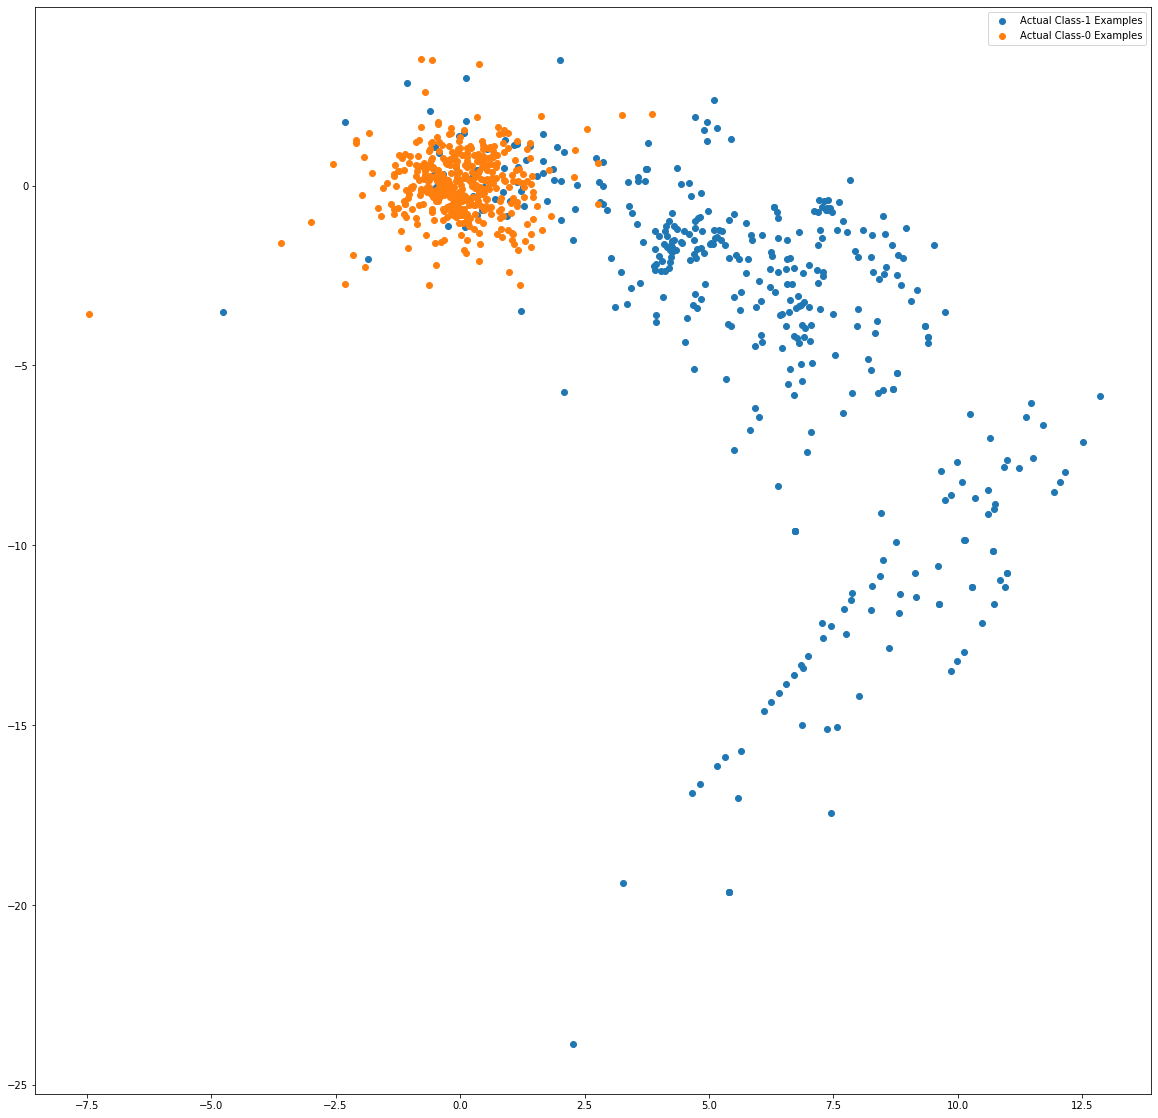

In [123]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_tran.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_tran.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [26]:
import sklearn.metrics
from sklearn.metrics import *
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [27]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
r_oversample = RandomOverSampler(sampling_strategy=0.5)
X_over_r_train, y_over_r_train = r_oversample.fit_resample(X_train_tran, y_train)
print(Counter(y_over_r_train))

Counter({0: 227451, 1: 113725})


# Sampling strategy enures that the size of the underepresented class is half the other class. Making their sizes equal might cause overfitting

# Trying Logistic Regression, Random Forest and XGBoost in that order

In [35]:
model = LogisticRegression()
solvers = ['saga']
penalty = ['l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
grid_search_rs = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result_rs = grid_search_rs.fit(X_over_r_train,y_over_r_train)

In [36]:
results = grid_result_rs.cv_results_

In [37]:
grid_result_rs.best_score_

0.9046278895142523

In [46]:
lr = LogisticRegression(C=100, penalty='l1', solver='saga')
lr.fit(X_over_r_train,y_over_r_train)
y_pred = lr.predict(X_test_tran)
score = recall_score(y_test, y_pred)
score

0.9183673469387755

In [38]:
grid_result_rs.best_estimator_

LogisticRegression(C=100, penalty='l1', solver='saga')

In [47]:
print ('Recall = ' , recall_score(y_test, y_pred))
print ('Precision = ' , precision_score(y_test, y_pred))
print ('Accuracy = ' , accuracy_score(y_test, y_pred))
print ('ROC = ' , roc_auc_score(y_test, y_pred))

Recall =  0.9183673469387755
Precision =  0.11479591836734694
Accuracy =  0.9876759945226642
ROC =  0.9530813943472718


In [39]:
rf = RandomForestClassifier(random_state=42)
params = {
    'max_depth': [2,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10, 25, 50, 100]
}
grid_search_rs1 = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1 , verbose=1, scoring="recall")
grid_result_rs1 = grid_search_rs1.fit(X_over_r_train,y_over_r_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [40]:
grid_result_rs1.best_score_

1.0

In [41]:
grid_result_rs1.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=10,
                       random_state=42)

In [48]:
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=10,
                       random_state=42)
rf.fit(X_over_r_train,y_over_r_train)
y_pred = rf.predict(X_test_tran)
print ('Recall = ' , recall_score(y_test, y_pred))
print ('Precision = ' , precision_score(y_test, y_pred))
print ('Accuracy = ' , accuracy_score(y_test, y_pred))
print ('ROC = ' , roc_auc_score(y_test, y_pred))

Recall =  0.8061224489795918
Precision =  0.8586956521739131
Accuracy =  0.9994382219725431
ROC =  0.9029469166676237


In [43]:
xgb=XGBClassifier()
params_2 = {"learning_rate"    : [0.10, 0.15, 0.20, 0.25] ,
 "max_depth"        : [ 3, 4, 5, 12, 15],
 "gamma"            : [ 0.0, 0.15 , 0.3]}
grid_search_rs2 = GridSearchCV(estimator=xgb,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="recall")
grid_result_rs2 = grid_search_rs2.fit(X_over_r_train,y_over_r_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [44]:
grid_result_rs2.best_score_

1.0

In [45]:
grid_result_rs2.best_estimator_

XGBClassifier(max_depth=10, min_samples_leaf=5, n_estimators=25)

In [49]:
xgb = XGBClassifier(max_depth=10, min_samples_leaf=5, n_estimators=25)
xgb.fit(X_over_r_train,y_over_r_train)
y_pred = xgb.predict(X_test_tran)
print ('Recall = ' , recall_score(y_test, y_pred))
print ('Precision = ' , precision_score(y_test, y_pred))
print ('Accuracy = ' , accuracy_score(y_test, y_pred))
print ('ROC = ' , roc_auc_score(y_test, y_pred))

Recall =  0.8163265306122449
Precision =  0.7766990291262136
Accuracy =  0.9992802219023208
ROC =  0.9079610283899717


# Logistic Regression has performed the best. There is no overfitting/underfitting and all values are acceptable. XGBoost and RandomForests are overfitting

Top var = 14
2nd Top var = 10
3rd Top var = 8


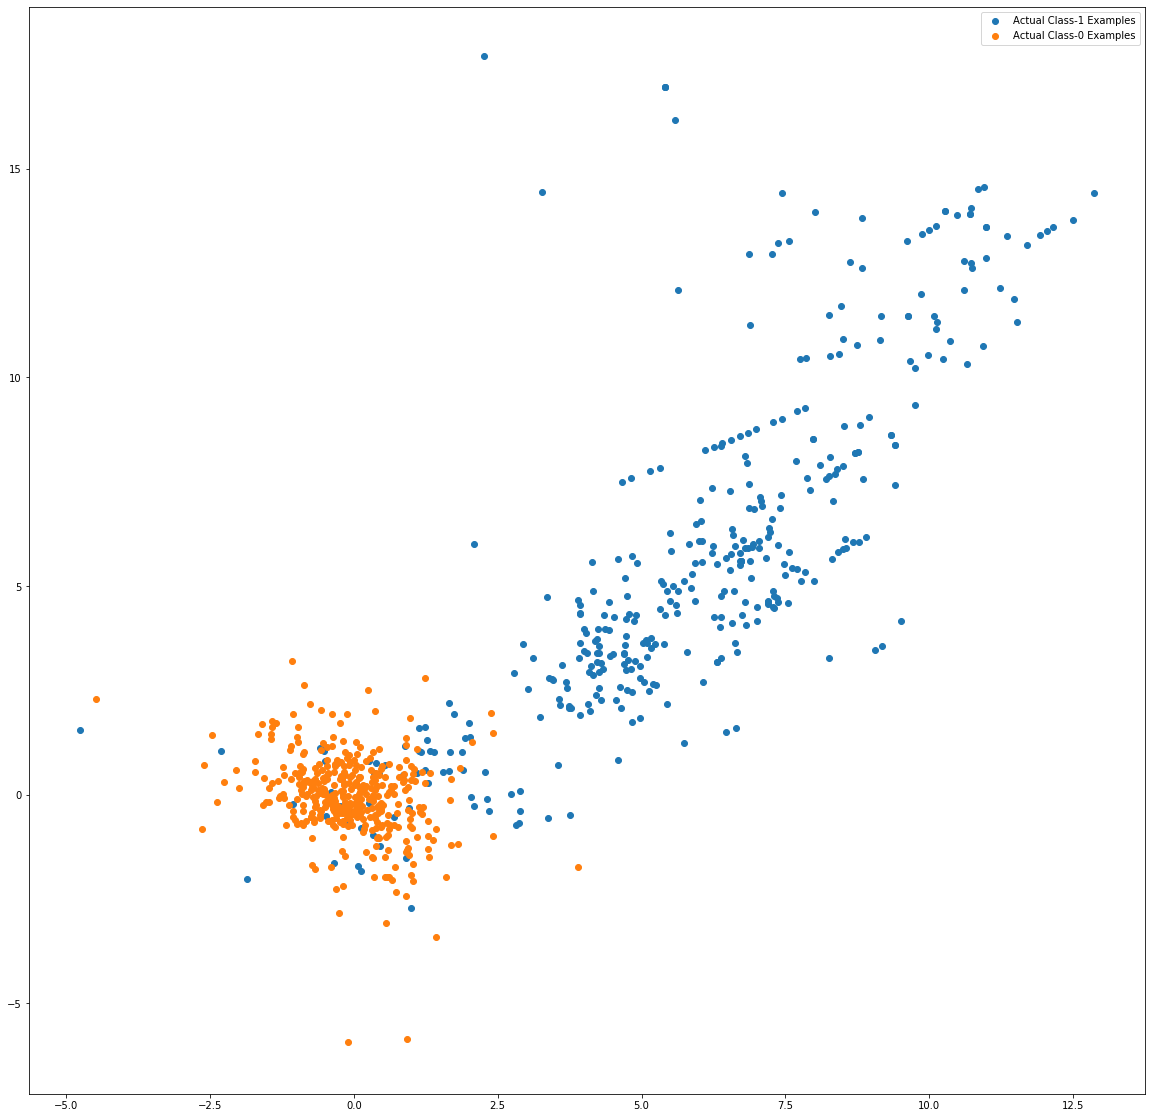

In [52]:
clf = LogisticRegression(C=100, penalty='l1', solver='saga')
clf.fit(X_over_r_train,y_over_r_train)
y_pred = clf.predict(X_test_tran)
var_imp = []
for i in clf.coef_[0]:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.coef_[0])[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.coef_[0])[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.coef_[0])[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.coef_[0])[-1])
second_top_var_index = var_imp.index(np.sort(clf.coef_[0])[-2])

X_train_1 = X_over_r_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_over_r_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# Applying SMOTE, with a lower sampling strategy than the previous time, in an attempt to get better results from XGBoost and Random Forest

### Print the class distribution after applying SMOTE 

In [35]:
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1 , sampling_strategy=0.3)
from collections import Counter
X_train_smote, y_train_smote = sm.fit_resample(X_train_tran, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do


In [31]:
counter = Counter(y_train_smote)
print(counter)

Counter({0: 227451, 1: 68235})


# Applying Logistic Regression, XGBoost and Random Forest again

In [35]:
model = LogisticRegression()
solvers = ['saga']
penalty = ['l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
grid_search_sm = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result_sm = grid_search_sm.fit(X_train_smote, y_train_smote)
print(grid_result_sm.best_score_)
print(grid_result_sm.best_estimator_)


0.8803105716534632
LogisticRegression(C=100, penalty='l1', solver='saga')


In [36]:
lr = grid_result_sm.best_estimator_
lr.fit(X_train_smote, y_train_smote)
y_pred = lr.predict(X_test_tran)
print ('Recall = ' , recall_score(y_test, y_pred))
print ('Precision = ' , precision_score(y_test, y_pred))
print ('Accuracy = ' , accuracy_score(y_test, y_pred))
print ('ROC = ' , roc_auc_score(y_test, y_pred))

Recall =  0.9183673469387755
Precision =  0.16822429906542055
Accuracy =  0.9920473297988133
ROC =  0.9552708287873394


In [37]:
rf = RandomForestClassifier(random_state=42)
params = {
    'max_depth': [2,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10, 25, 50, 100]
}
grid_search_sm2 = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1 , verbose=1, scoring="recall")
grid_result_sm2 = grid_search_sm2.fit(X_train_smote, y_train_smote)
print(grid_result_sm2.best_score_)
print(grid_result_sm2.best_estimator_)


Fitting 3 folds for each of 60 candidates, totalling 180 fits
0.9948999780171466
RandomForestClassifier(max_depth=20, min_samples_leaf=5, random_state=42)


In [38]:
rf = grid_result_sm2.best_estimator_
rf.fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_test_tran)
print ('Recall = ' , recall_score(y_test, y_pred))
print ('Precision = ' , precision_score(y_test, y_pred))
print ('Accuracy = ' , accuracy_score(y_test, y_pred))
print ('ROC = ' , roc_auc_score(y_test, y_pred))

Recall =  0.8673469387755102
Precision =  0.8095238095238095
Accuracy =  0.999420666409185
ROC =  0.9334976111997978


In [39]:
xgb=XGBClassifier()
params_2 = {"learning_rate"    : [0.10, 0.15, 0.20, 0.25] ,
 "max_depth"        : [ 3, 4, 5, 12, 15],
 "gamma"            : [ 0.0, 0.15 , 0.3]}
grid_search_sm3 = GridSearchCV(estimator=xgb,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="recall")
grid_result_sm3 = grid_search_sm3.fit(X_train_smote, y_train_smote)
print(grid_result_sm3.best_score_)
print(grid_result_sm3.best_estimator_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
0.9992818934564373
XGBClassifier(max_depth=20, min_samples_leaf=5)


In [36]:
xg = XGBClassifier(max_depth=20, min_samples_leaf=5)
xg.fit(X_train_smote, y_train_smote)
y_pred = xg.predict(X_test_tran)
print ('Recall = ' , recall_score(y_test, y_pred))
print ('Precision = ' , precision_score(y_test, y_pred))
print ('Accuracy = ' , accuracy_score(y_test, y_pred))
print ('ROC = ' , roc_auc_score(y_test, y_pred))

Recall =  0.8367346938775511
Precision =  0.8541666666666666
Accuracy =  0.9994733330992591
ROC =  0.9182442462072055


# XGBoost and Random Forest have performed better than Logistic Regression in this case. Bringing down the number of oversampled datapoints seems to have worked

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

# Further bringing down the sampling strategy in an attempt to get better results

In [28]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=0 , sampling_strategy=0.2 )
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_tran, y_train)

In [29]:
model = LogisticRegression()
solvers = ['saga']
penalty = ['l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
grid_search_asm = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result_asm = grid_search_asm.fit(X_train_adasyn, y_train_adasyn)
print(grid_result_asm.best_score_)
print(grid_result_asm.best_estimator_)

0.6635087015426089
LogisticRegression(C=100, penalty='l1', solver='saga')


In [30]:
lr = grid_result_asm.best_estimator_
lr.fit(X_train_adasyn, y_train_adasyn)
y_pred = lr.predict(X_test_tran)
print ('Recall = ' , recall_score(y_test, y_pred))
print ('Precision = ' , precision_score(y_test, y_pred))
print ('Accuracy = ' , accuracy_score(y_test, y_pred))
print ('ROC = ' , roc_auc_score(y_test, y_pred))

Recall =  0.9183673469387755
Precision =  0.07131537242472266
Accuracy =  0.9792844352375267
ROC =  0.948878383655094


In [31]:
rf = RandomForestClassifier(random_state=42)
params = {
    'max_depth': [2,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10, 25, 50, 100]
}
grid_search_asm2 = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1 , verbose=1, scoring="recall")
grid_result_asm2 = grid_search_asm2.fit(X_train_adasyn, y_train_adasyn)
print(grid_result_asm2.best_score_)
print(grid_result_asm2.best_estimator_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
0.7778216865353795
RandomForestClassifier(max_depth=20, min_samples_leaf=20, n_estimators=10,
                       random_state=42)


In [32]:
rf = grid_result_asm2.best_estimator_
rf.fit(X_train_adasyn, y_train_adasyn)
y_pred = rf.predict(X_test_tran)
print ('Recall = ' , recall_score(y_test, y_pred))
print ('Precision = ' , precision_score(y_test, y_pred))
print ('Accuracy = ' , accuracy_score(y_test, y_pred))
print ('ROC = ' , roc_auc_score(y_test, y_pred))

Recall =  0.8673469387755102
Precision =  0.6538461538461539
Accuracy =  0.9989817773252344
ROC =  0.9332777884648513


In [33]:
xgb=XGBClassifier()
params_2 = {"learning_rate"    : [0.10, 0.15, 0.20, 0.25] ,
 "max_depth"        : [ 3, 4, 5, 12, 15],
 "gamma"            : [ 0.0, 0.15 , 0.3 ,0.5]}
grid_search_asm3 = GridSearchCV(estimator=xgb,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")
grid_result_asm3 = grid_search_asm3.fit(X_train_adasyn, y_train_adasyn)
print(grid_result_asm3.best_score_)
print(grid_result_asm3.best_estimator_)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
0.8344414253104889
XGBClassifier(max_depth=10, min_samples_leaf=5)


In [34]:
xg = grid_result_asm3.best_estimator_
xg.fit(X_train_adasyn, y_train_adasyn)
y_pred = xg.predict(X_test_tran)
print ('Recall = ' , recall_score(y_test, y_pred))
print ('Precision = ' , precision_score(y_test, y_pred))
print ('Accuracy = ' , accuracy_score(y_test, y_pred))
print ('ROC = ' , roc_auc_score(y_test, y_pred))

Recall =  0.8571428571428571
Precision =  0.6942148760330579
Accuracy =  0.9991046662687406
ROC =  0.9282460909237077


# XGBoost has performed better than the other two. Logistic Regression has given poor precision

# Considering the best ROC score without compromising other metrics, ADASYN with XGBoost has given the best results

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 10
3rd Top var = 5


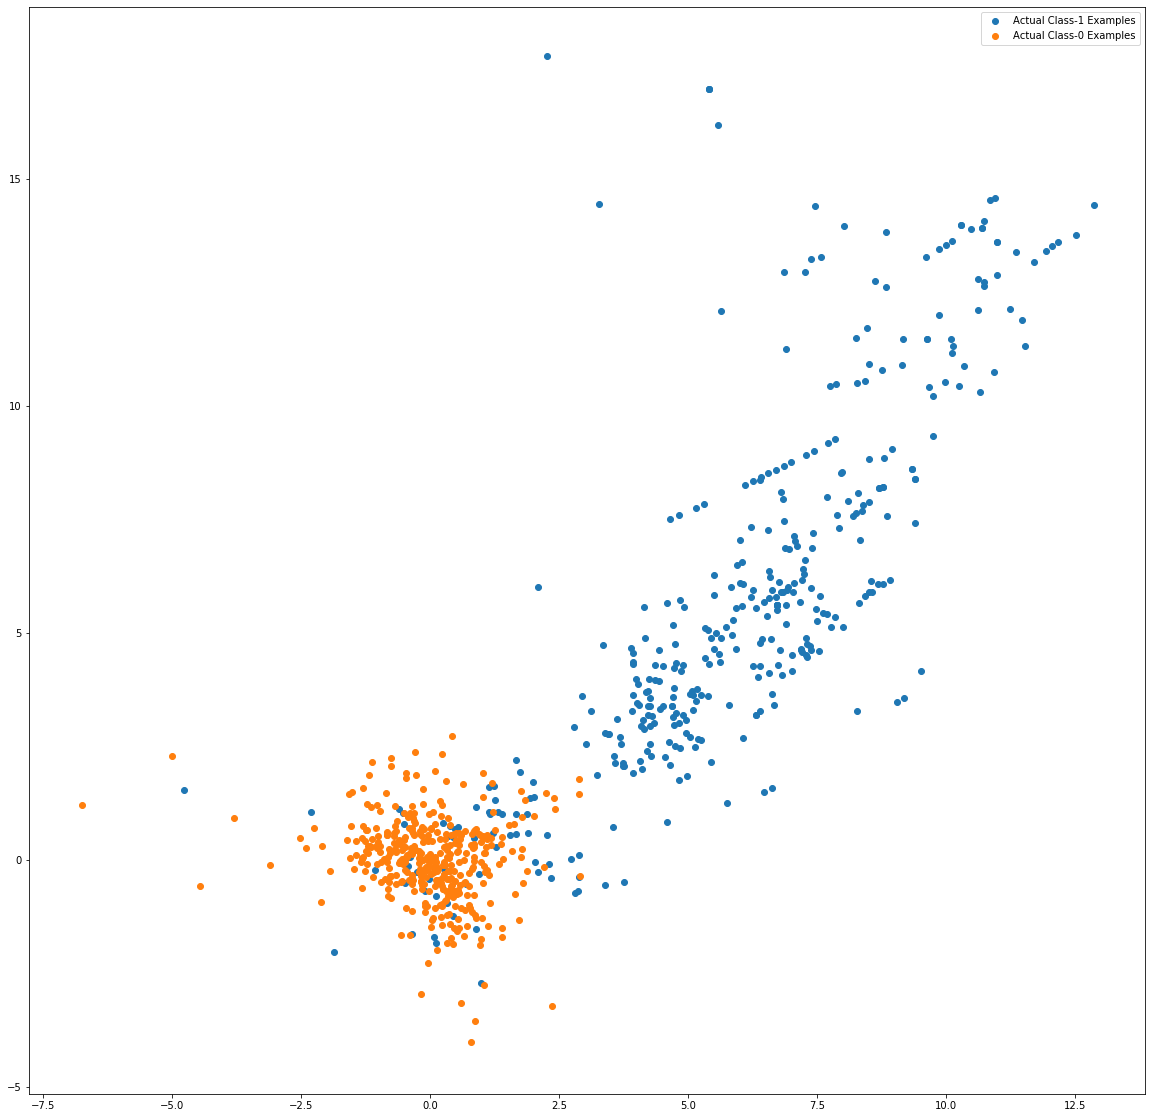

In [37]:
var_imp = []
for i in xg.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xg.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xg.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xg.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xg.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xg.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [38]:
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion

array([[56850,    14],
       [   16,    82]])

In [40]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [41]:
print('sensitivity = ' , TP / float(TP+FN))

sensitivity =  0.8367346938775511


In [43]:
print('specificity = ' , TN / float(TN+FP))

specificity =  0.9997537985368599


In [44]:
print('FPR = ' , FP/ float(TN+FP))

FPR =  0.0002462014631401238


In [46]:
print('positive predictive value = ' , (TP / float(TP+FP)))

positive predictive value =  0.8541666666666666


In [48]:
print('Negative predictive value = ' ,(TN / float(TN+ FN)))

Negative predictive value =  0.9997186367952731


In [49]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

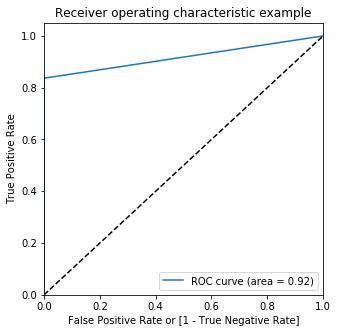

In [51]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_pred, drop_intermediate = False )
draw_roc(y_test, y_pred)

In [57]:
print('Train auc =', metrics.roc_auc_score(y_test, y_pred))
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9182442462072055
1
